# clustering - unsupervised Machine Learning

In [1]:
# flat clustering (K means)
# hierarchical clustering (mean shift)

In [3]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
import numpy as np
from sklearn.cluster import KMeans

In [4]:
X = np.array([[1,2],
             [1.5, 1.8],
             [5, 8],
             [8, 8],
             [1, 0.6],
              [9, 11]])

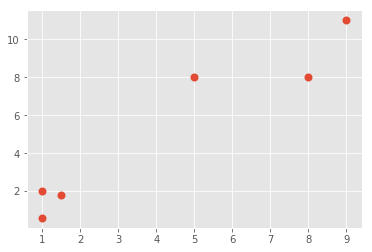

In [43]:
plt.scatter(X[:, 0], X[:, 1], s=25, linewidths=3)

In [11]:
clf = KMeans(n_clusters=2, max_iter=300)
clf.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

[[7.33333333 9.        ]
 [1.16666667 1.46666667]]
[1 1 0 0 1 0]
1.0 2.0
1.5 1.8
5.0 8.0
8.0 8.0
1.0 0.6
9.0 11.0


Text(0.5,1,'K-means clustering')

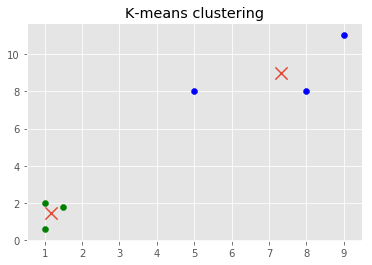

In [56]:
centroids = clf.cluster_centers_
labels = clf.labels_
% matplotlib inline
print(centroids)
print(labels)
colors = {1:'g', 0:'b'}
for i in range(len(X)):
    print(X[i][0], X[i][1])
    plt.scatter(X[i][0], X[i][1], color=colors[labels[i]])    
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=150)
plt.title('K-means clustering')

# Handling non numerical data

In [185]:
from sklearn import cross_validation, preprocessing
import pandas as pd
df = pd.read_excel(r'C:\Users\Mfornaroli\Downloads\titanic.xls')

In [186]:
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [187]:
print(df.sex.unique())
print(df.sex.describe())

['female' 'male']
count     1309
unique       2
top       male
freq       843
Name: sex, dtype: object


In [188]:
df.drop(['body', 'name'], 1, inplace=True)  # they dont add information
# df.convert_object(convert_numeric=True)
df.fillna(0)

,pclass,survived,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,home.dest
0,1,1,female,29.0000,0,0,24160,211.3375,B5,S,2,"St Louis, MO"
1,1,1,male,0.9167,1,2,113781,151.5500,C22 C26,S,11,"Montreal, PQ / Chesterville, ON"
2,1,0,female,2.0000,1,2,113781,151.5500,C22 C26,S,0,"Montreal, PQ / Chesterville, ON"
3,1,0,male,30.0000,1,2,113781,151.5500,C22 C26,S,0,"Montreal, PQ / Chesterville, ON"
4,1,0,female,25.0000,1,2,113781,151.5500,C22 C26,S,0,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,female,14.5000,1,0,2665,14.4542,0,C,0,0
1305,3,0,female,0.0000,1,0,2665,14.4542,0,C,0,0
1306,3,0,male,26.5000,0,0,2656,7.2250,0,C,0,0
1307,3,0,male,27.0000,0,0,2670,7.2250,0,C,0,0


In [189]:
df.dtypes

pclass         int64
survived       int64
sex           object
age          float64
sibsp          int64
parch          int64
ticket        object
fare         float64
cabin         object
embarked      object
boat          object
home.dest     object
dtype: object

In [190]:
# just a way to assign values to text
def handle_non_numerical_data(df):
    columns = df.columns.values
    for col in columns:
        text_digit_vals = {}
        def convert_to_int(val):
            return text_digit_vals[val]  # funzione ritorna valore associato a dizionario, da popolare per ogni colonna
        if df[col].dtype != 'int64' and df[col].dtype != 'float64':
            col_contents = df[col].values.tolist()
            unique_elements = set(col_contents)
            x = 0
            for unique in unique_elements:
                if unique not in text_digit_vals:
                    text_digit_vals[unique] = x
                    x += 1
            df[col] = list(map(convert_to_int, df[col]))
            # this will apply the function to every element in df[col], convert it to list and put it in df[col]
    return df

In [191]:
df = handle_non_numerical_data(df)
df.head(7)

,pclass,survived,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,home.dest
0,1,1,1,29.0000,0,0,731,211.3375,68,0,1,310
1,1,1,0,0.9167,1,2,495,151.5500,34,0,7,313
2,1,0,1,2.0000,1,2,495,151.5500,34,0,0,313
3,1,0,0,30.0000,1,2,495,151.5500,34,0,0,313
4,1,0,1,25.0000,1,2,495,151.5500,34,0,0,313
5,1,1,0,48.0000,0,0,677,26.5500,66,0,17,64
6,1,1,1,63.0000,1,0,538,77.9583,107,0,9,10


In [192]:
df.dtypes

pclass         int64
survived       int64
sex            int64
age          float64
sibsp          int64
parch          int64
ticket         int64
fare         float64
cabin          int64
embarked       int64
boat           int64
home.dest      int64
dtype: object

In [193]:
'''
Hi Sentdex. I think you are making a mistake encoding categorical variables as continuous numerical. Technically, you should create a dummy variable for each class (if the variable has more than 2 classes). For example, if you have a variable 'city', and the following dataset [(n0, Tokio), (n1, Rome),  (n2, Rome), (n3, London)], you should transform it as follows: [(n0, 1,0,0), (n1,0,1,0), (n2,0,1,0), (n3,0,0,1)]
This is the correct way according to statistics books. If you just convert it to a continuous numerical variable, the algo won't know that you are not talking about a quantity. If you feed that data to a linear regression, for example, you would end up with weird results such as "y grows 0.25 for each unitary increase of city", which doesn't make sense. On the other hand, if you use the dummy variables you end up
with something like "y grows 0.25 when 'london' is 1 and everything else is 0', which is much more meaningful.
Pandas has a method pd.get_dummies() that does that process for you, but it's very heavy on memory, because if you have a variable with 1000 categories you will have 1000 more columns. I'm looking for a way to solve that problem, maybe sparse arrays? But how do we combine a sparse array with a non-sparse array at the moment of algo-fitting?
Can we work out something?
'''

'\nHi Sentdex. I think you are making a mistake encoding categorical variables as continuous numerical. Technically, you should create a dummy variable for each class (if the variable has more than 2 classes). For example, if you have a variable \'city\', and the following dataset [(n0, Tokio), (n1, Rome),  (n2, Rome), (n3, London)], you should transform it as follows: [(n0, 1,0,0), (n1,0,1,0), (n2,0,1,0), (n3,0,0,1)]\nThis is the correct way according to statistics books. If you just convert it to a continuous numerical variable, the algo won\'t know that you are not talking about a quantity. If you feed that data to a linear regression, for example, you would end up with weird results such as "y grows 0.25 for each unitary increase of city", which doesn\'t make sense. On the other hand, if you use the dummy variables you end up\nwith something like "y grows 0.25 when \'london\' is 1 and everything else is 0\', which is much more meaningful.\nPandas has a method pd.get_dummies() that 

In [194]:
type(df.columns.values)

numpy.ndarray

In [195]:
s = pd.Series(['fox', 'cow', np.nan, 'dog'])
s

0    fox
1    cow
2    NaN
3    dog
dtype: object

In [196]:
s=list(map('I am a {}'.format, s))
# map, quando prende come input funzione, la applica a ogni elemento della serie, di default
s

['I am a fox', 'I am a cow', 'I am a nan', 'I am a dog']

# part 2 

In [237]:
# how to encode features - is a topic that you should go deeper in
df.columns
df = df.fillna(0)   # careful! this will return a new dataframe! you have to store it somewhere otherwise won't work
df.age.astype('float64')
df[(df.age.isna()) | (df.fare.isna())]

,pclass,survived,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,home.dest


In [238]:
X = np.array(df.drop(['survived'], 1).astype('float64'))
y = np.array(df.survived)

In [239]:
clf = KMeans(n_clusters=2)
clf.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [240]:
# try it yourself